In [1]:
import sys
sys.path.insert(1, 'D:\osm-transitgraph')
import geopandas as gpd
import shapely
import pandas as pd

from AccessibilityEvaluators import AccessibilityEvaluator, GeneralAccessibilityEvaluator
gpkg='D:\osm-transitgraph\msc\msc_tests.gpkg'
zones=gpd.read_file(gpkg, layer='msc_zones')

zones['zone_id']=zones.index

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\o'
C:\Users\gamma\AppData\Local\Temp\ipykernel_5276\2567356583.py:2: SyntaxWarning: invalid escape sequence '\o'
  sys.path.insert(1, 'D:\osm-transitgraph')
C:\Users\gamma\AppData\Local\Temp\ipykernel_5276\2567356583.py:8: SyntaxWarning: invalid escape sequence '\o'
  gpkg='D:\osm-transitgraph\msc\msc_tests.gpkg'


In [2]:
raptor_all = gpd.read_file(gpkg, layer='test_int3_all')

eval_all = AccessibilityEvaluator(raptor=raptor_all, zones=zones.copy(), type='all')
od_all = eval_all.get_od_matrix()
eval_all.get_spatial_bandwidth()
zones_all=eval_all.zones

100%|██████████| 436/436 [00:15<00:00, 27.52it/s]


In [3]:
raptor_wh = gpd.read_file(gpkg, layer='test_int3_wh')

eval_wh = AccessibilityEvaluator(raptor=raptor_wh, zones=zones.copy(), type='wh')
od_wh = eval_wh.get_od_matrix()
eval_wh.get_spatial_bandwidth()
zones_wh=eval_wh.zones

100%|██████████| 436/436 [00:19<00:00, 21.96it/s]


In [4]:
zones_all.to_file(gpkg, layer='zones_all')
zones_wh.to_file(gpkg, layer='zones_wh')

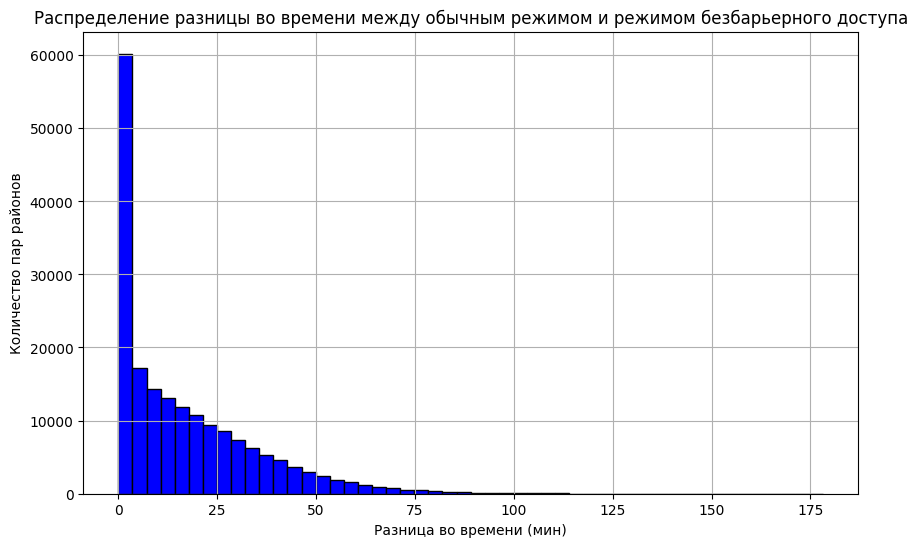

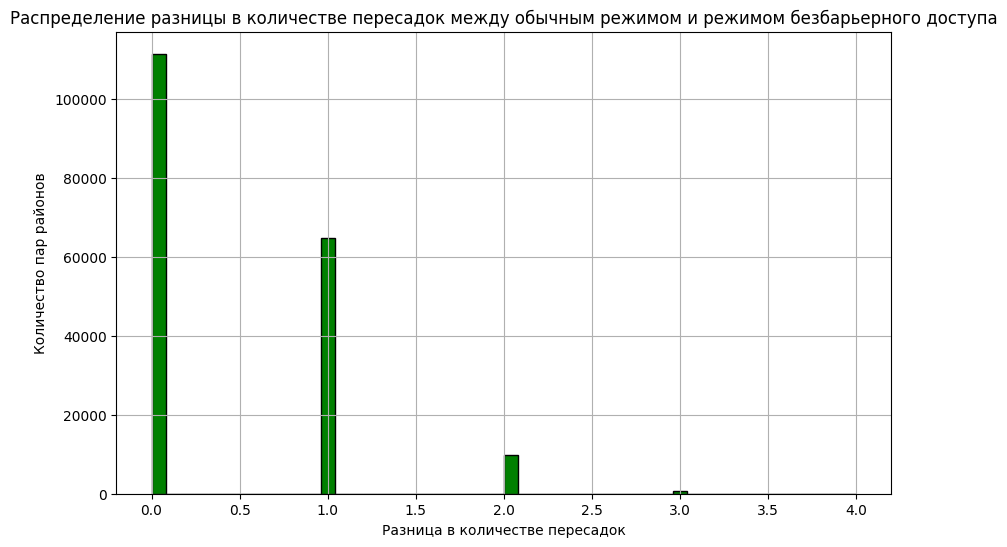

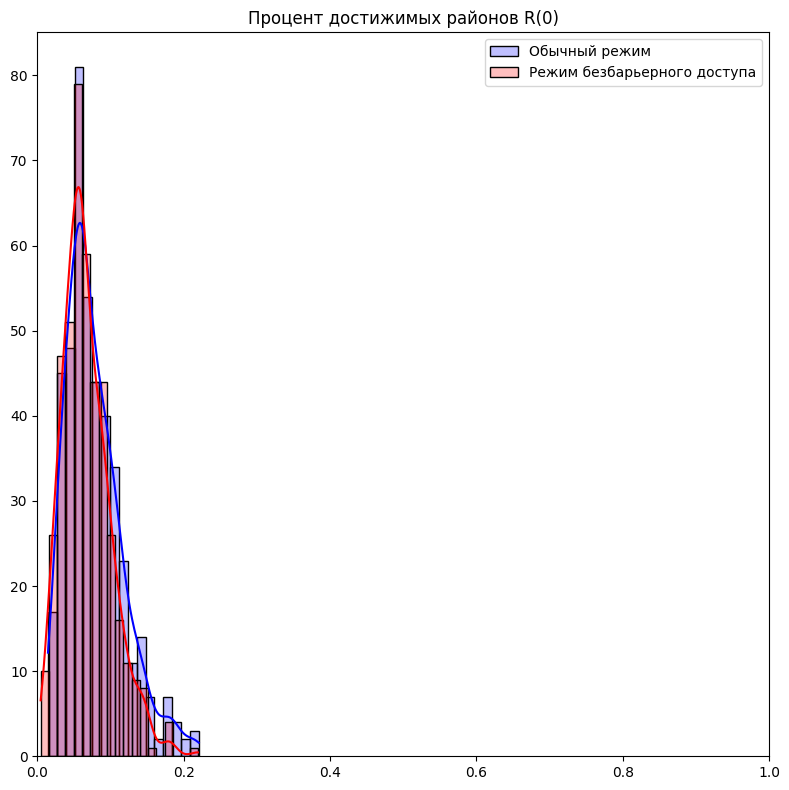

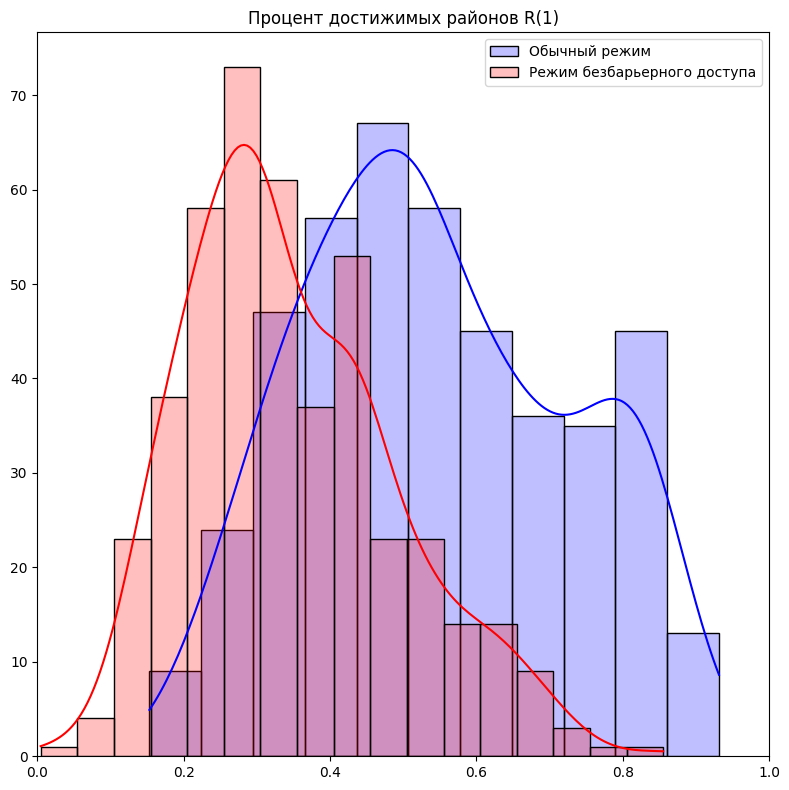

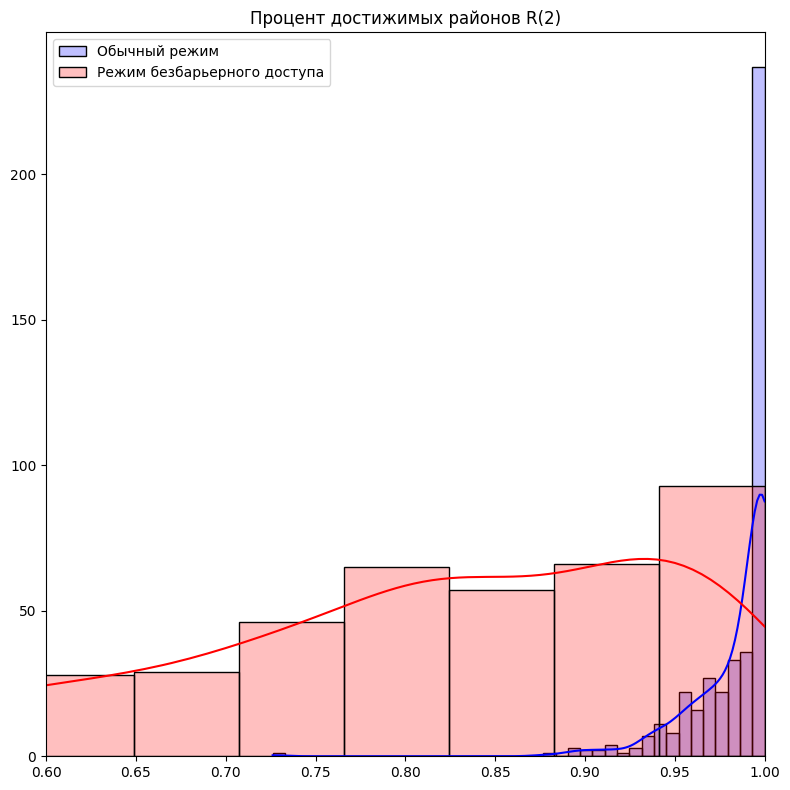

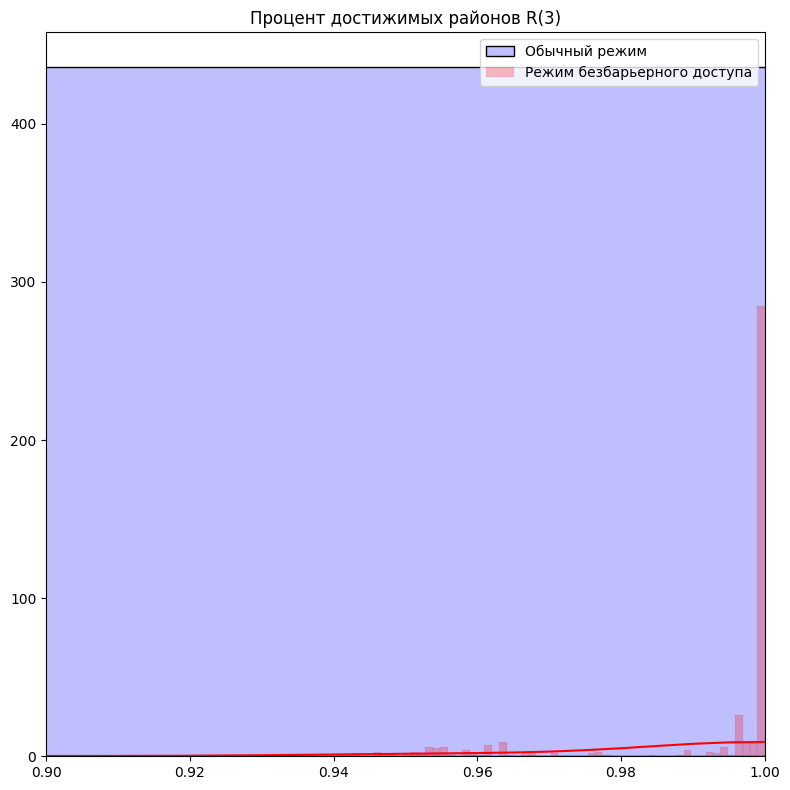

In [5]:
gae=GeneralAccessibilityEvaluator(zones_all, zones_wh, restr_type='wh')
gae.measure_A()
gae.measure_Traveltime(od_all, od_wh)
gae.save_measures(gpkg, lr='zones_values')
gae.plot_distribution()